In [36]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os
from IPython.display import Video
import subprocess
from IPython.display import Image as IPyImage

I am going to test YOLO version 8 nano.

In [2]:
model = YOLO("yolov8n.pt")

# Inference on pictures

### Picture 1 : dog and person

(np.float64(-0.5), np.float64(1279.5), np.float64(852.5), np.float64(-0.5))

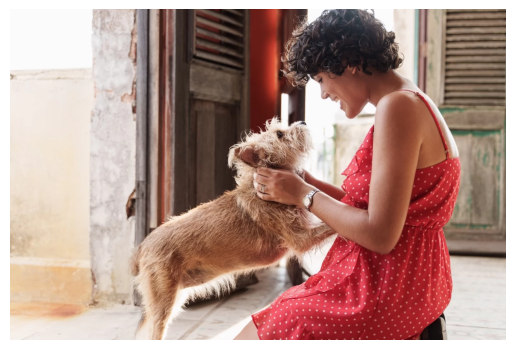

In [3]:
img_path =  r"C:\Users\Chiara\Pictures\donna_cane.webp"
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")

In [4]:
# YOLO 

results = model(img)


0: 448x640 1 person, 1 dog, 40.2ms
Speed: 11.3ms preprocess, 40.2ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


(np.float64(-0.5), np.float64(1279.5), np.float64(852.5), np.float64(-0.5))

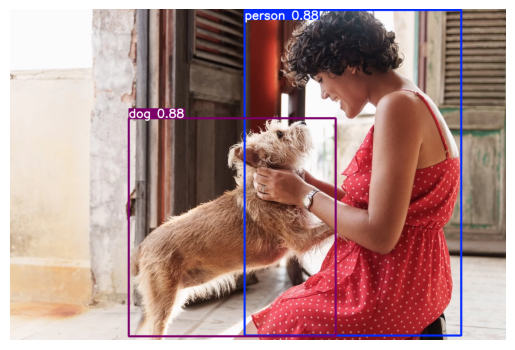

In [5]:
annotated_img = results[0].plot() 

plt.imshow(annotated_img[..., ::-1]) 
plt.axis("off")

### Picture 2 : a street

(np.float64(-0.5), np.float64(1193.5), np.float64(619.5), np.float64(-0.5))

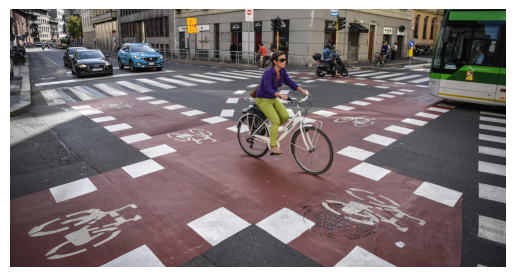

In [6]:
img_path =  r"C:\Users\Chiara\Pictures\bici.jpeg"
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")


0: 352x640 9 persons, 1 bicycle, 3 cars, 1 motorcycle, 1 bus, 31.4ms
Speed: 1.2ms preprocess, 31.4ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)


(np.float64(-0.5), np.float64(1193.5), np.float64(619.5), np.float64(-0.5))

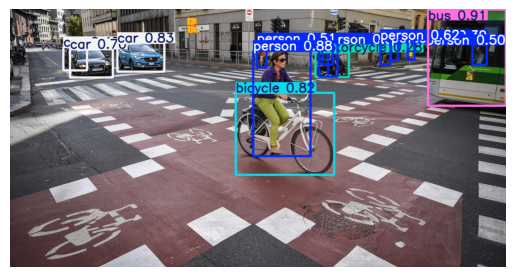

In [7]:
results = model(img)

annotated_img = results[0].plot() 

plt.imshow(annotated_img[..., ::-1]) 
plt.axis("off")

In [8]:
# for a more clear output

r = results[0]

boxes = r.boxes.xyxy
scores = r.boxes.conf
classes = r.boxes.cls
names = r.names

for box, score, cls in zip(boxes, scores, classes):
    print(
        f"Box: {box.numpy()}, "
        f"Score: {score:.3f}, "
        f"Classe: {names[int(cls)]}"
    )

Box: [     1006.4      1.6114      1193.6      232.24], Score: 0.915, Classe: bus
Box: [     585.25      100.34      723.29       353.9], Score: 0.879, Classe: person
Box: [     258.32      81.461      371.78       150.4], Score: 0.831, Classe: car
Box: [     543.61      201.78      780.95      398.05], Score: 0.821, Classe: bicycle
Box: [     144.52      96.432      247.18       164.5], Score: 0.699, Classe: car
Box: [     891.32      74.687      915.08      133.84], Score: 0.617, Classe: person
Box: [     594.76      82.128      617.96      140.17], Score: 0.509, Classe: person
Box: [     1113.6      86.313      1147.7      134.41], Score: 0.495, Classe: person
Box: [     128.07      91.894      185.11      147.82], Score: 0.432, Classe: car
Box: [     957.71      75.431      973.69      122.95], Score: 0.394, Classe: person
Box: [     917.09      81.583      934.33      123.53], Score: 0.334, Classe: person
Box: [     751.26      84.542      777.36      133.65], Score: 0.300, Classe

### Picture 3 : boats

(np.float64(-0.5), np.float64(1169.5), np.float64(667.5), np.float64(-0.5))

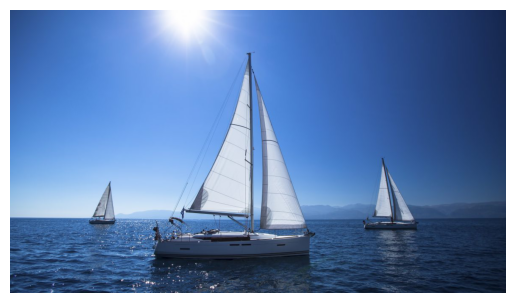

In [9]:
img_path =  r"C:\Users\Chiara\Pictures\barche.jpg"
img = Image.open(img_path)

plt.imshow(img)
plt.axis("off")


0: 384x640 1 person, 3 boats, 30.3ms
Speed: 1.1ms preprocess, 30.3ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)


(np.float64(-0.5), np.float64(1169.5), np.float64(667.5), np.float64(-0.5))

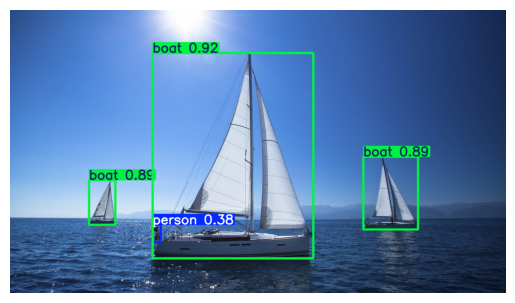

In [10]:
results = model(img)

annotated_img = results[0].plot() 

plt.imshow(annotated_img[..., ::-1]) 
plt.axis("off")

In [11]:
# for a more clear output

r = results[0]

boxes = r.boxes.xyxy
scores = r.boxes.conf
classes = r.boxes.cls
names = r.names

for box, score, cls in zip(boxes, scores, classes):
    print(
        f"Box: {box.numpy()}, "
        f"Score: {score:.3f}, "
        f"Classe: {names[int(cls)]}"
    )

Box: [     336.74      103.98      715.75      586.85], Score: 0.917, Classe: boat
Box: [     833.57      347.82      962.52      518.67], Score: 0.892, Classe: boat
Box: [     186.71      402.08      248.09      507.08], Score: 0.891, Classe: boat
Box: [     336.24      507.93      355.53      548.71], Score: 0.376, Classe: person


He detects a person, even if I am quite sure there isn't one (however, the confidence is low).

## Inference on videos

### Video 1 : Montréal street

## Video 2 : Onyx and Chussey

Funny to see how YOLO doesn't recognize if the dog is really a dog or a cat.